(1028, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   is_sub_legendary  1028 non-null   int64  
 7   is_legendary      1028 non-null   int64  
 8   is_mythical       1028 non-null   int64  
 9   species           1027 non-null   object 
 10  type_number       1028 non-null   int64  
 11  type_1            1027 non-null   object 
 12  type_2            541 non-null    object 
 13  height_m          1027 non-null   float64
 14  weight_kg         1026 non-null   float64
 15  abilities_number  1028 non-null   int64  
 16  ability_1         1024 non-null

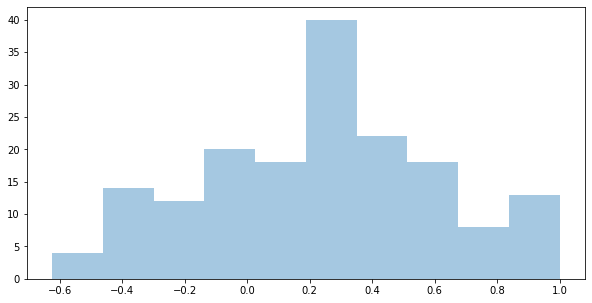

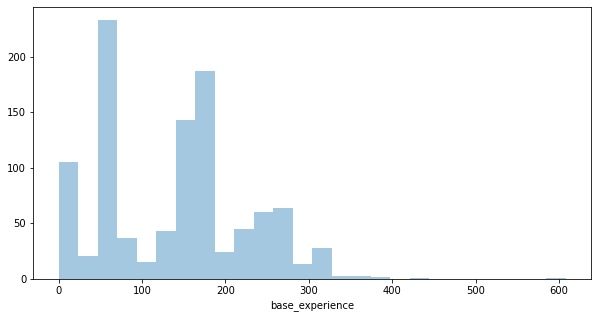

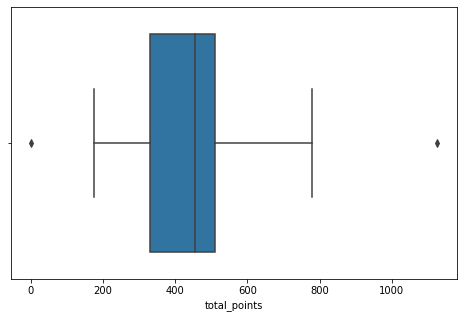

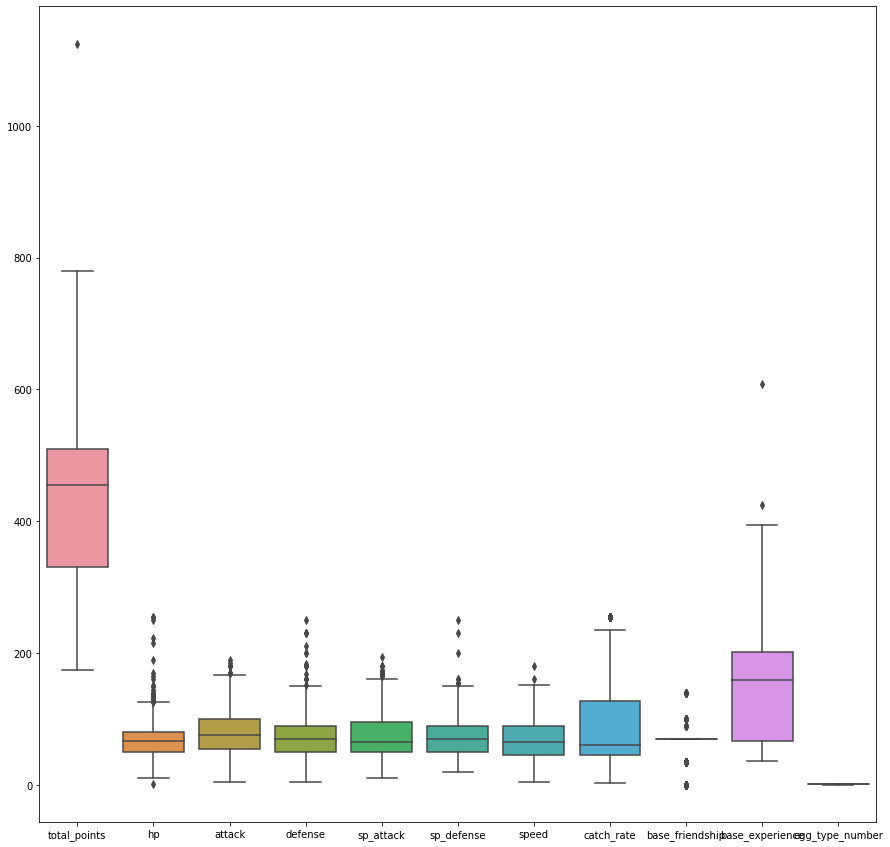

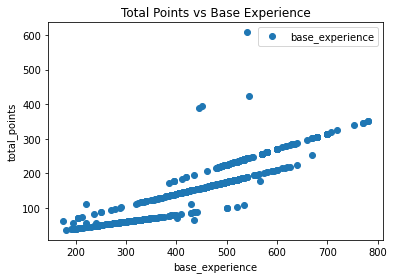

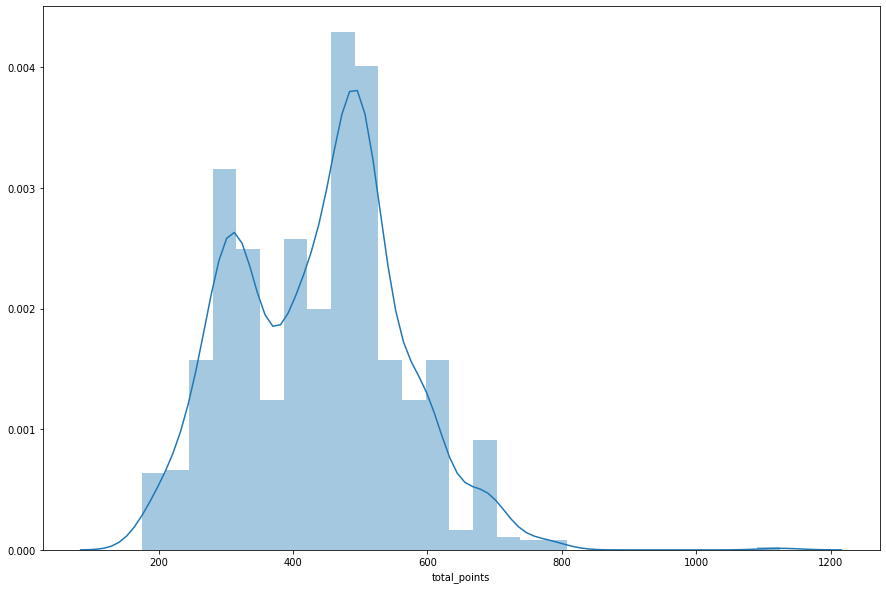

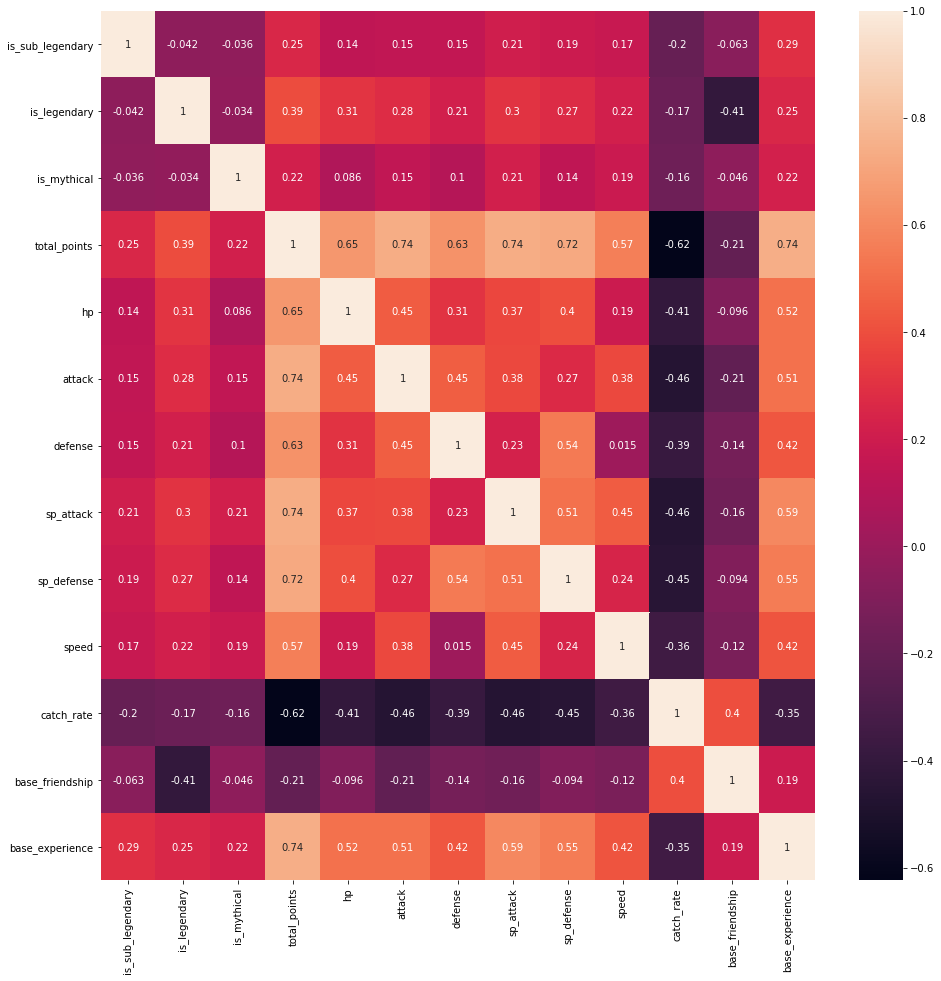

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 1)

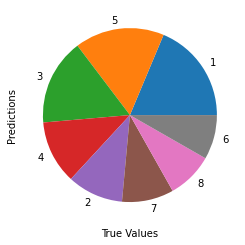

In [8]:
'''
Vincent Perez, MS-IDBT Cohort 6 - 5847842892
ACAD 499 Machine Intelligence / AI for Design Applications, Spring 2020
vincenjp@usc.edu
Final Project Part 3
'''

#Importing Libraries
import numpy as np
from numpy import array
from numpy import argmax
import matplotlib.pyplot as plt #This for math?
from matplotlib.pyplot import figure
import csv # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd # importing pandas as pd
pd.set_option('display.max_rows',20000, 'display.max_columns',100)
import seaborn as sb #import Seaborn to for visualizing data
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
#import warnings
#warnings.filterwarnings('ignore')



# Making data frame from the csv file
'''columns = "name pokedex_number generation is_sub_legendary is_legendary is_mythical type_number abilities_number " \
          "total_points hp attack defense sp_attack sp_defense speed catch_rate base_friendship base_experience " \
          "egg_type_number".split(" ") # Declare the columns names'''

pokeDf = pd.read_csv("Dataset/pokedex_(Update.04.20).csv")

#print(pokeDf.shape)
#print(pokeDf.describe())
#print(pokeDf.info())

#This is where we try and replace the typing with a number, decided against it because the algorithm could try and use
# the ascending numbers as value indicators

'''def type_numbering(string) :
    if string == 'Normal' :
        return 1
    elif string== 'Fire' :
        return 2
    elif string == 'Fighting' :
        return 3
    elif string == 'Water' :
        return 4
    elif string == 'Flying' :
        return 5
    elif string == 'Grass' :
        return 6
    elif string == 'Poison' :
        return 7
    elif string == 'Electric' :
        return 8
    elif string == 'Ground' :
        return 9
    elif string == 'Psychic' :
        return 10
    elif string == 'Rock' :
        return 11
    elif string == 'Ice' :
        return 12
    elif string == 'Bug' :
        return 13
    elif string == 'Dragon' :
        return 14
    elif string == 'Ghost' :
        return 15
    elif string == 'Dark' :
        return 16
    elif string == 'Steel' :
        return 17
    elif string == 'Fairy' :
        return 18
    else :
        return 0

pokeDf['Type 1'] = pokeDf['type_1'].apply(type_numbering)
pokeDf['Type 2'] = pokeDf['type_2'].apply(type_numbering)

poketypes = ['normal','fire','water', 'water', 'electric', 'grass', 'ice', 'fighting', 'poison', 'ground',
              'flying','psychic', 'bug', 'rock', 'ghost', 'dragon', 'dark', 'dark','steel', 'fairy']'''

#general fact finding
#print(pokeDf.groupby(['generation','is_legendary']).count()['name'])
#print(pokeDf['is_legendary'].value_counts())

#Varrying lists that are important

list_of_num_fields = ['Unnamed: 0','pokedex_number', 'generation', 'is_sub_legendary', 'is_legendary', 'is_mythical',
                      'type_number', 'hp', 'defense', 'attack','sp_attack','sp_defense','speed', 'catch_rate', 'base_friendship',
                      'base_experience', 'against_fairy', 'against_steel', 'against_dark', 'against_dragon', 'against_ghost',
                      'against_rock','against_bug', 'against_psychic', 'against_flying', 'against_ground', 'against_poison',
                      'against_fight','against_ice','against_ice', 'against_grass', 'against_electric', 'against_water',
                      'against_fire','against_normal', 'abilities_number', 'height_m', 'weight_kg', 'type_number', ]

list_of_object_fields = ['type_1', 'type_2', 'egg_type_2', 'egg_type_1','growth_rate', 'ability_hidden','ability_2', 'ability_1',]


#This is where we create a list of the fields that are in our data frame so that we can effectively pivot and analyze data
listOTypes =  ['Unnamed: 0']

list_of_all = ['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name', 'generation', 'is_sub_legendary',
               'is_legendary', 'is_mythical', 'species', 'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
               'abilities_number', 'ability_1', 'ability_2', 'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
               'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship', 'base_experience', 'growth_rate',
               'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles','against_fairy',
               'against_steel', 'against_dark', 'against_dragon', 'against_ghost','against_rock', 'against_bug',
               'against_psychic', 'against_flying', 'against_ground', 'against_poison', 'against_fight',
               'against_ice','against_ice', 'against_grass', 'against_electric', 'against_water', 'against_fire',
               'against_normal', ]

list_of_object_field= ['name', 'german_name', 'japanese_name', 'species', 'ability_1', 'ability_2', 'growth_rate',
                       'egg_type_1', 'egg_type_2',]

list_of_final_fields = ['is_sub_legendary', 'is_legendary', 'is_mythical', 'type_number'
                        'hp', 'defense', 'attack','sp_attack','sp_defense','speed', 'catch_rate', 'base_friendship',
                        'base_experience']

list_of_stats = ['hp', 'defense', 'attack','sp_attack','sp_defense','speed', 'catch_rate', 'base_friendship',
                ]

list_to_drop = ['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name', 'generation', 'is_sub_legendary',
               'is_legendary', 'is_mythical', 'species', 'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
               'abilities_number', 'ability_1', 'ability_2', 'ability_hidden', 'growth_rate', 'egg_type_number',
                'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles','against_fairy',
               'against_steel', 'against_dark', 'against_dragon', 'against_ghost','against_rock', 'against_bug',
               'against_psychic', 'against_flying', 'against_ground', 'against_poison', 'against_fight',
               'against_ice','against_ice', 'against_grass', 'against_electric', 'against_water', 'against_fire',
               'against_normal',]

list_of_in_game_random= ['height_m', 'weight_kg', 'ability_2', 'ability_1','abilities_number', 'ability_hidden'
                         'growth_rate', 'egg_type_2', 'egg_type_1', 'percentage_male', 'egg_cycles', ]

list_of_against= ['against_fairy', 'against_steel', 'against_dark', 'against_dragon', 'against_ghost','against_rock',
                'against_bug', 'against_psychic', 'against_flying', 'against_ground', 'against_poison', 'against_fight',
                'against_ice','against_ice', 'against_grass', 'against_electric', 'against_water', 'against_fire',
                'against_normal',]

pokemon_stats = pokeDf.drop(['against_fairy', 'against_steel', 'against_dark', 'against_dragon', 'against_ghost',
                             'against_rock', 'against_bug', 'against_psychic', 'against_flying', 'against_ground',
                             'against_poison', 'against_fight', 'against_ice','against_ice', 'against_grass',
                             'against_electric', 'against_water', 'against_fire', 'against_normal','height_m',
                             'weight_kg', 'ability_2', 'ability_1','abilities_number', 'ability_hidden', 'growth_rate',
                             'egg_type_2', 'egg_type_1', 'percentage_male', 'egg_cycles', 'Unnamed: 0','name', 'german_name',
                             'japanese_name', 'species', 'type_1', 'type_2', 'ability_1', 'ability_2', 'growth_rate',
                             'egg_type_2', 'egg_type_1','growth_rate', 'ability_hidden', 'type_1', 'type_2','pokedex_number',
                             'generation', 'is_sub_legendary', 'is_legendary', 'is_mythical', 'type_number'], axis=1)

#this is our new DF for the algorithm
pokePure = pokeDf.drop(list_to_drop, axis=1)

#This is where we fill in any missing values with a 0
pokePure.fillna(0, inplace=True)

#poke print (count, sum, mean, median, mode, std, min, max, abs, prod, cumsum, cumprod
#print(pokePure.mean())
#print("total_points mean:", pokePure['total_points'].mean())
#print("base_experience mean:", pokePure['base_experience'].mean())
#print(pokePure.describe().astype(int))

#this just shows us the number of missing data in cells
#print("Number of missing cells: ", pokePure.isnull().sum().sum())

#Pokesearch
'''pokesearch = input('Enter Pokemon name to Find: ')
while pokesearch is True:
    for row in pokeDf:
    #if current rows 2nd value is equal to input, print that row
        if pokesearch == pokeDf['name']:
            print("yes")
        continue'''

#Corr Matrix
pokeCorr = pokePure.corr()
plt.figure(figsize=(10,5))
sb.distplot(pokeCorr, kde=False)

#displot will show both a histogram of you data and the Kernel Density Estimation (KDE)

plt.figure(figsize=(10,5))
sb.distplot(pokePure.base_experience, kde=False)

#boxplot for one column of data
plt.figure(figsize=(8,5))
sb.boxplot(pokePure.total_points)

plt.figure(figsize=(15,15))
sb.boxplot(data=pokemon_stats)

#General Graph
pokeDf.plot(x='total_points', y='base_experience', style='o')
plt.title('Total Points vs Base Experience')
plt.xlabel('base_experience')
plt.ylabel('total_points')
plt.show()

#Average Stats
plt.figure(figsize=(15,10))
plt.tight_layout()
sb.distplot(pokeDf['total_points'])

#Using the Pearson Correlation since we want to calculate the pearson coefficient of correlation.
#pokecorr = pokeDf.corr(method='pearson')
#print(pokecorr)

#Correlation matrix
pokeCorrMatrix =pokePure.corr()
plt.figure(figsize=(16, 16))
sb.heatmap(pokeCorrMatrix, annot=True)
plt.show()

#Generation Pie graph breakdown
pokeDf['generation'].value_counts().head(10).plot.pie()

#Regression model with x & Y
#this is our linear regression model
# define the target variable (dependent variable) as y
'''
x = pokePure.base_experience
y = pokePure.total_points
'''

X = pokePure['base_experience'].values.reshape(-1,1)
y = pokePure['total_points'].values.reshape(-1,1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(pokePure, y, test_size=0.2, random_state=5)
print('This is our training set:', X_train.shape, y_train.shape)
print('This is our test set:', X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

#To retrieve the intercept:
print('Intercept:', lm.intercept_)
#For retrieving the slope:
print('Slope:', lm.coef_)

print('These are our predictions:',predictions[:5])

# The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

#Print Score, The left plot has a perfect positive linear relationship between x and y, so r = 1
print('Score:', model.score(X_test, y_test))

#Predictions
y_pred = lm.predict(X_test)
pokePure = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(pokePure[:10])

#algorithm performance evals
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

'''
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(y_train, y).predict(y_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test, pred, normalize = True))
'''

'''
#random Forest
pokemon = pokePure.sample(frac=1)
X = pokemon.drop('base_experience', axis = 1)
y = pokemon['base_experience']

# Split into train and validation set
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

model_rf = RandomForestRegressor(oob_score = True,
                                 random_state=0)

model_rf.fit(train_X, train_y)
preds = model_rf.predict(val_X)

print(mean_absolute_error(val_y, preds))

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(model_rf.score(train_X, train_y),
                                                                                             model_rf.oob_score_,
                                                                                             model_rf.score(val_X, val_y)))'''
'''

#Linear Regression 2

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(X, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(X, y_predicted, color='r')
plt.show()

#Training Vs. Test Set Comparision
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
'''
'''
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
'''
